In [1]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('C:/datasets/Hotel Reservations_Proj1.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10.0,2,Offline,0.0,0,0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11.0,6,Online,0.0,0,0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2.0,28,Online,0.0,0,0,60.00,0,CanceEled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5.0,20,Online,0.0,0,0,100.00,0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4.0,11,Online,0.0,0,0,94.50,0,Canceled


# EXPLORATIVE DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36301 non-null  object 
 1   no_of_adults                          36299 non-null  float64
 2   no_of_children                        36298 non-null  float64
 3   no_of_weekend_nights                  36300 non-null  float64
 4   no_of_week_nights                     36299 non-null  float64
 5   type_of_meal_plan                     36301 non-null  object 
 6   required_car_parking_space            36301 non-null  int64  
 7   room_type_reserved                    36301 non-null  object 
 8   lead_time                             36295 non-null  float64
 9   arrival_year                          36301 non-null  int64  
 10  arrival_month                         36300 non-null  float64
 11  arrival_date   

# VISUALIZATION

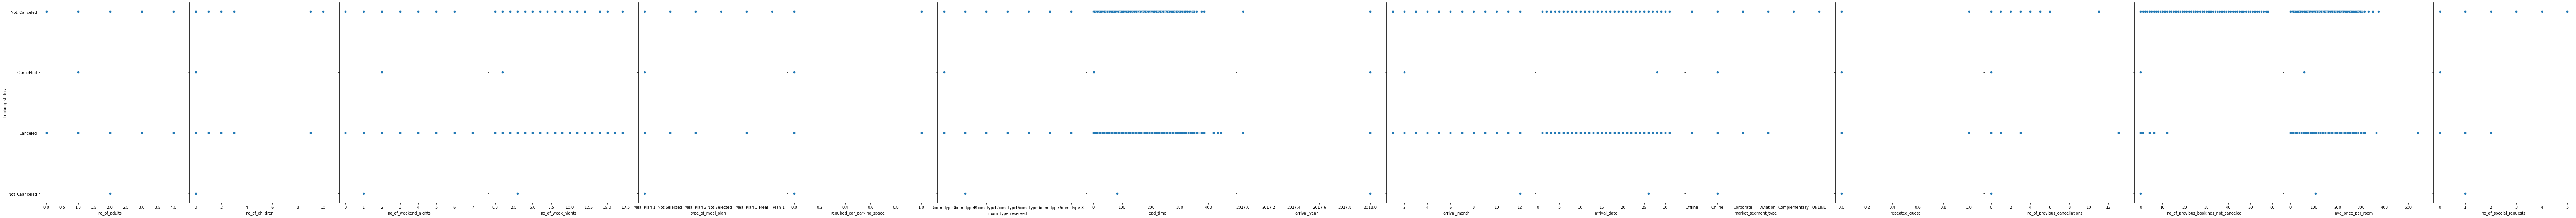

In [5]:
# Visualise the relationship between the features and the response using scatterplots
sb.pairplot(df, x_vars=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'], y_vars= 'booking_status',height=8, aspect=0.7, kind='scatter')

In [6]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            2
no_of_children                          3
no_of_weekend_nights                    1
no_of_week_nights                       2
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               6
arrival_year                            0
arrival_month                           1
arrival_date                            0
market_segment_type                     0
repeated_guest                          1
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      6
no_of_special_requests                  0
booking_status                          0
dtype: int64

# DROPPING UNWANTED COLUMN

In [7]:
#Since booking id will not be needed so therefore the column will be dropped.

df = df.drop(['Booking_ID'], axis=1)

# CHECKING AND DROPPING DUPLICATES

In [8]:
def duplicate():
    df.drop_duplicates(keep = 'first', inplace = True)
    dp = df.duplicated().sum()
    df.reset_index(drop =True, inplace = True)
    print(f'The total number of duplicate is: {dp}')
    
#From the function written it was deduce that the data set have 26 duplicates.
duplicate()

The total number of duplicate is: 0


# TREATING FOR MISSING VALUES

In [9]:
def missing():
    df.dropna(inplace = True)
    miss = df.isna().sum()
    total = sum(miss)
    print(f'The total number of missing value is: {total}')

        
missing()

#From the function written it was deduce that the data set have 22 missing values. 

The total number of missing value is: 0


In [10]:
df.duplicated().sum()

0

In [11]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10.0,2,Offline,0.0,0,0,65.00,0,Not_Canceled
1,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11.0,6,Online,0.0,0,0,106.68,1,Not_Canceled
2,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2.0,28,Online,0.0,0,0,60.00,0,CanceEled
3,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5.0,20,Online,0.0,0,0,100.00,0,Canceled
4,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4.0,11,Online,0.0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,Meal Plan 1,0,Room_Type 6,0.0,2018,10.0,6,Online,0.0,0,0,216.00,0,Canceled
26004,3.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 4,85.0,2018,8.0,3,Online,0.0,0,0,167.80,1,Not_Canceled
26005,2.0,0.0,1.0,3.0,Meal Plan 1,0,Room_Type 1,228.0,2018,10.0,17,Online,0.0,0,0,90.95,2,Canceled
26007,2.0,0.0,0.0,3.0,Not Selected,0,Room_Type 1,63.0,2018,4.0,21,Online,0.0,0,0,94.50,0,Canceled


In [12]:
df.duplicated().sum()

0

# TREATING FOR MISLABELED SAMPLES

In [13]:
#It was also deduce that the data set have issues of mis label in some features and it fixed using the .replace().

df['booking_status'] = df['booking_status'].replace(['Not_Canceled','CanceEled','Not_Caanceled'], 
                                                    ['Not Canceled', 'Canceled','Not Canceled'])
df['booking_status'].unique()

array(['Not Canceled', 'Canceled'], dtype=object)

In [14]:
df['market_segment_type'] = df['market_segment_type'].replace(['ONLINE'], 
                                                    ['Online'])
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [15]:
type_meal = []
for item in df['type_of_meal_plan']:
    if str(item).endswith('1'):
        new_item = 1
        type_meal.append(new_item)
    elif str(item).endswith('2'):
        new_item = 2
        type_meal.append(new_item)
    elif str(item).endswith('3'):
        new_item = 3
        type_meal.append(new_item)
    else:
        type_meal.append(0)

In [16]:
df['type_of_meal_plan'] = type_meal

In [17]:
def type_room(x):
    for i in range(1,8):
        if x == i:
            return i
        else:
            continue

In [18]:
df['room_type_reserved'] = df['room_type_reserved'].apply(lambda x: type_room(int(x[-1])))

In [19]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,1,0,1,224.0,2017,10.0,2,Offline,0.0,0,0,65.00,0,Not Canceled
1,2.0,0.0,2.0,3.0,0,0,1,5.0,2018,11.0,6,Online,0.0,0,0,106.68,1,Not Canceled
2,1.0,0.0,2.0,1.0,1,0,1,1.0,2018,2.0,28,Online,0.0,0,0,60.00,0,Canceled
3,2.0,0.0,0.0,2.0,1,0,1,211.0,2018,5.0,20,Online,0.0,0,0,100.00,0,Canceled
4,2.0,0.0,1.0,1.0,0,0,1,48.0,2018,4.0,11,Online,0.0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,1,0,6,0.0,2018,10.0,6,Online,0.0,0,0,216.00,0,Canceled
26004,3.0,0.0,2.0,6.0,1,0,4,85.0,2018,8.0,3,Online,0.0,0,0,167.80,1,Not Canceled
26005,2.0,0.0,1.0,3.0,1,0,1,228.0,2018,10.0,17,Online,0.0,0,0,90.95,2,Canceled
26007,2.0,0.0,0.0,3.0,0,0,1,63.0,2018,4.0,21,Online,0.0,0,0,94.50,0,Canceled


In [20]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

# ENCODING CATEGORICAL VARIABLES

In [21]:
columns_to_encode = ['booking_status']
encoder = LabelEncoder()
df['booking_status'] = encoder.fit_transform(df['booking_status'])

In [22]:
df['booking_status']

0        1
1        1
2        0
3        0
4        0
        ..
26003    0
26004    1
26005    0
26007    0
26008    1
Name: booking_status, Length: 25989, dtype: int32

In [23]:
df1 = pd.get_dummies(df, columns=['market_segment_type'])


In [24]:
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.0,0.0,1.0,2.0,1,0,1,224.0,2017,10.0,...,0,0,65.00,0,1,0,0,0,1,0
1,2.0,0.0,2.0,3.0,0,0,1,5.0,2018,11.0,...,0,0,106.68,1,1,0,0,0,0,1
2,1.0,0.0,2.0,1.0,1,0,1,1.0,2018,2.0,...,0,0,60.00,0,0,0,0,0,0,1
3,2.0,0.0,0.0,2.0,1,0,1,211.0,2018,5.0,...,0,0,100.00,0,0,0,0,0,0,1
4,2.0,0.0,1.0,1.0,0,0,1,48.0,2018,4.0,...,0,0,94.50,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,1,0,6,0.0,2018,10.0,...,0,0,216.00,0,0,0,0,0,0,1
26004,3.0,0.0,2.0,6.0,1,0,4,85.0,2018,8.0,...,0,0,167.80,1,1,0,0,0,0,1
26005,2.0,0.0,1.0,3.0,1,0,1,228.0,2018,10.0,...,0,0,90.95,2,0,0,0,0,0,1
26007,2.0,0.0,0.0,3.0,0,0,1,63.0,2018,4.0,...,0,0,94.50,0,0,0,0,0,0,1


In [25]:
df1.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [26]:
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests']

In [27]:
df2 = df1[cols]

In [28]:
df2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.0,0.0,1.0,2.0,1,0,1,224.0,2017,10.0,2,0.0,0,0,65.00,0
1,2.0,0.0,2.0,3.0,0,0,1,5.0,2018,11.0,6,0.0,0,0,106.68,1
2,1.0,0.0,2.0,1.0,1,0,1,1.0,2018,2.0,28,0.0,0,0,60.00,0
3,2.0,0.0,0.0,2.0,1,0,1,211.0,2018,5.0,20,0.0,0,0,100.00,0
4,2.0,0.0,1.0,1.0,0,0,1,48.0,2018,4.0,11,0.0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,1,0,6,0.0,2018,10.0,6,0.0,0,0,216.00,0
26004,3.0,0.0,2.0,6.0,1,0,4,85.0,2018,8.0,3,0.0,0,0,167.80,1
26005,2.0,0.0,1.0,3.0,1,0,1,228.0,2018,10.0,17,0.0,0,0,90.95,2
26007,2.0,0.0,0.0,3.0,0,0,1,63.0,2018,4.0,21,0.0,0,0,94.50,0


In [29]:
col = ['market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online','booking_status',]

In [30]:
df3 = df1[col]

In [31]:
df3

,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,0,0,0,1,0,1
1,0,0,0,0,1,1
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
26003,0,0,0,0,1,0
26004,0,0,0,0,1,1
26005,0,0,0,0,1,0
26007,0,0,0,0,1,0


In [32]:
#After encodeing the categorical variables, i linked it up with the numerical dataframe by using pd.concat()

In [33]:
dfNew = pd.concat([df2, df3], axis = 1)

In [34]:
dfNew

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2.0,0.0,1.0,2.0,1,0,1,224.0,2017,10.0,...,0,0,65.00,0,0,0,0,1,0,1
1,2.0,0.0,2.0,3.0,0,0,1,5.0,2018,11.0,...,0,0,106.68,1,0,0,0,0,1,1
2,1.0,0.0,2.0,1.0,1,0,1,1.0,2018,2.0,...,0,0,60.00,0,0,0,0,0,1,0
3,2.0,0.0,0.0,2.0,1,0,1,211.0,2018,5.0,...,0,0,100.00,0,0,0,0,0,1,0
4,2.0,0.0,1.0,1.0,0,0,1,48.0,2018,4.0,...,0,0,94.50,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,1,0,6,0.0,2018,10.0,...,0,0,216.00,0,0,0,0,0,1,0
26004,3.0,0.0,2.0,6.0,1,0,4,85.0,2018,8.0,...,0,0,167.80,1,0,0,0,0,1,1
26005,2.0,0.0,1.0,3.0,1,0,1,228.0,2018,10.0,...,0,0,90.95,2,0,0,0,0,1,0
26007,2.0,0.0,0.0,3.0,0,0,1,63.0,2018,4.0,...,0,0,94.50,0,0,0,0,0,1,0


In [35]:
dfNew.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
market_segment_type_Aviation            0
market_segment_type_Complementary       0
market_segment_type_Corporate           0
market_segment_type_Offline             0
market_segment_type_Online              0
booking_status                          0
dtype: int64

In [36]:
dfNew

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2.0,0.0,1.0,2.0,1,0,1,224.0,2017,10.0,...,0,0,65.00,0,0,0,0,1,0,1
1,2.0,0.0,2.0,3.0,0,0,1,5.0,2018,11.0,...,0,0,106.68,1,0,0,0,0,1,1
2,1.0,0.0,2.0,1.0,1,0,1,1.0,2018,2.0,...,0,0,60.00,0,0,0,0,0,1,0
3,2.0,0.0,0.0,2.0,1,0,1,211.0,2018,5.0,...,0,0,100.00,0,0,0,0,0,1,0
4,2.0,0.0,1.0,1.0,0,0,1,48.0,2018,4.0,...,0,0,94.50,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,1,0,6,0.0,2018,10.0,...,0,0,216.00,0,0,0,0,0,1,0
26004,3.0,0.0,2.0,6.0,1,0,4,85.0,2018,8.0,...,0,0,167.80,1,0,0,0,0,1,1
26005,2.0,0.0,1.0,3.0,1,0,1,228.0,2018,10.0,...,0,0,90.95,2,0,0,0,0,1,0
26007,2.0,0.0,0.0,3.0,0,0,1,63.0,2018,4.0,...,0,0,94.50,0,0,0,0,0,1,0


# CHECKING FOR MULTICOLINEARITY
If there are any two features having correlation greater than 0.8, that indicates a presence of multicolinearity. So therefore, there is a need to drop that particular column.

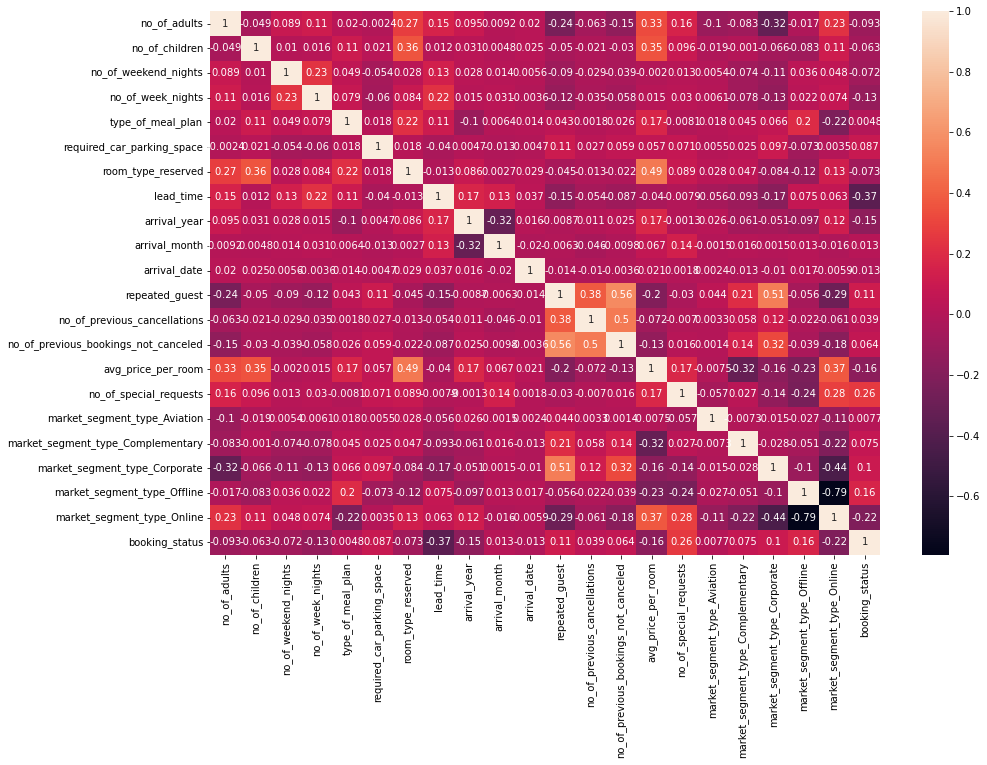

In [37]:
plt.figure(figsize=(15,10))
sb.heatmap(dfNew.corr(),annot=True)
plt.show()

#From the heatmap below it shows that there is no issue of multicolinearity.

In [38]:
dfNew.corr().booking_status.sort_values(ascending=False)

booking_status                          1.000000
no_of_special_requests                  0.257639
market_segment_type_Offline             0.160676
repeated_guest                          0.112306
market_segment_type_Corporate           0.102998
required_car_parking_space              0.086995
market_segment_type_Complementary       0.074750
no_of_previous_bookings_not_canceled    0.064334
no_of_previous_cancellations            0.039430
arrival_month                           0.012850
market_segment_type_Aviation            0.007742
type_of_meal_plan                       0.004792
arrival_date                           -0.013336
no_of_children                         -0.063421
no_of_weekend_nights                   -0.072000
room_type_reserved                     -0.072573
no_of_adults                           -0.093137
no_of_week_nights                      -0.126920
arrival_year                           -0.152272
avg_price_per_room                     -0.155646
market_segment_type_

In [39]:
dfNew.shape

(25989, 22)

# SEPARATING INDEPENDENT AND DEPENDENT VARIABLES

In [40]:
X = dfNew.drop('booking_status', axis = 1)
Y = dfNew['booking_status']

In [41]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.0,0.0,1.0,2.0,1,0,1,224.0,2017,10.0,...,0.0,0,0,65.00,0,0,0,0,1,0
1,2.0,0.0,2.0,3.0,0,0,1,5.0,2018,11.0,...,0.0,0,0,106.68,1,0,0,0,0,1
2,1.0,0.0,2.0,1.0,1,0,1,1.0,2018,2.0,...,0.0,0,0,60.00,0,0,0,0,0,1
3,2.0,0.0,0.0,2.0,1,0,1,211.0,2018,5.0,...,0.0,0,0,100.00,0,0,0,0,0,1
4,2.0,0.0,1.0,1.0,0,0,1,48.0,2018,4.0,...,0.0,0,0,94.50,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,2.0,2.0,0.0,1.0,1,0,6,0.0,2018,10.0,...,0.0,0,0,216.00,0,0,0,0,0,1
26004,3.0,0.0,2.0,6.0,1,0,4,85.0,2018,8.0,...,0.0,0,0,167.80,1,0,0,0,0,1
26005,2.0,0.0,1.0,3.0,1,0,1,228.0,2018,10.0,...,0.0,0,0,90.95,2,0,0,0,0,1
26007,2.0,0.0,0.0,3.0,0,0,1,63.0,2018,4.0,...,0.0,0,0,94.50,0,0,0,0,0,1


In [42]:
y = pd.DataFrame(Y, columns = ['booking_status'])

In [43]:
y

,booking_status
0,1
1,1
2,0
3,0
4,0
...,...
26003,0
26004,1
26005,0
26007,0


In [44]:
y['booking_status'].value_counts(normalize = True)

1    0.713687
0    0.286313
Name: booking_status, dtype: float64

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

In [46]:
Y_train['booking_status'].value_counts()

1    14838
0     5953
Name: booking_status, dtype: int64

In [47]:
X_train.shape

(20791, 21)

# NORMALIZING DATA

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)

In [49]:
X_train_s

array([[0.5       , 0.        , 0.28571429, ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.28571429, ..., 0.        , 0.        ,
        1.        ],
       [0.25      , 0.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ]])

# MODEL BUILDING

In [50]:
model = LR(max_iter = 500)
model.fit(X_train_s, Y_train)
y_pred = model.predict(X_test_s)

accuracyScore = metrics.accuracy_score(y_pred, Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
accuracyScore

0.804155444401693

In [52]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [53]:
Y_test['booking_status'].value_counts()

1    3710
0    1488
Name: booking_status, dtype: int64

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61      1488
           1       0.83      0.91      0.87      3710

    accuracy                           0.80      5198
   macro avg       0.77      0.72      0.74      5198
weighted avg       0.80      0.80      0.80      5198



Text(33.0, 0.5, 'Actual Values')

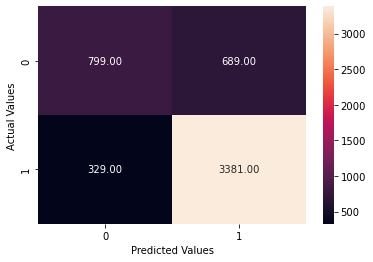

In [55]:
cm_plot = sb.heatmap(confusion_matrix(Y_test, y_pred), annot = True, fmt = '.2f')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

# LABEL BALANCING

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE(random_state = 42)
X_new, Y_new = sm.fit_resample(X,y)

In [58]:
Y_new['booking_status'].value_counts()

1    18548
0    18548
Name: booking_status, dtype: int64

In [59]:
y['booking_status'].value_counts()

1    18548
0     7441
Name: booking_status, dtype: int64

In [60]:
X_new

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.000000,0.000000,1.000000,2.000000,1,0,1,224.000000,2017,10.00000,...,0.0,0,0,65.000000,0,0,0,0,1,0
1,2.000000,0.000000,2.000000,3.000000,0,0,1,5.000000,2018,11.00000,...,0.0,0,0,106.680000,1,0,0,0,0,1
2,1.000000,0.000000,2.000000,1.000000,1,0,1,1.000000,2018,2.00000,...,0.0,0,0,60.000000,0,0,0,0,0,1
3,2.000000,0.000000,0.000000,2.000000,1,0,1,211.000000,2018,5.00000,...,0.0,0,0,100.000000,0,0,0,0,0,1
4,2.000000,0.000000,1.000000,1.000000,0,0,1,48.000000,2018,4.00000,...,0.0,0,0,94.500000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37091,2.509898,0.490102,1.019796,1.490102,1,0,1,89.490102,2018,6.54949,...,0.0,0,0,127.560348,0,0,0,0,0,0
37092,2.000000,0.000000,0.219912,3.780088,1,0,1,85.450220,2018,3.00000,...,0.0,0,0,88.830000,1,0,0,0,0,1
37093,2.087510,1.824980,1.000000,1.912490,1,0,5,35.824980,2018,2.17502,...,0.0,0,0,160.394988,0,0,0,0,0,1
37094,2.000000,0.000000,1.673205,3.692822,1,0,1,78.653589,2018,11.00000,...,0.0,0,0,91.600580,1,0,0,0,0,1


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_new,Y_new, test_size = 0.2, stratify = Y_new, random_state = 42)

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_S = scaler.fit_transform(X_train)

X_test_S = scaler.transform(X_test)

# ALGORITHM 1: LOGISTIC REGRESSION

In [63]:
model1 = LR(max_iter = 500)
model1.fit(X_train_S , y_train)
y_pred1 = model.predict(X_train_S)

accuracyScore = metrics.accuracy_score(y_pred1,  y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report( y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72     14838
           1       0.70      0.91      0.79     14838

    accuracy                           0.76     29676
   macro avg       0.79      0.76      0.76     29676
weighted avg       0.79      0.76      0.76     29676



# ALGORITHM 2: KNEIGHBORSCLASSIFIER

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


knn.fit(X_train_S,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [66]:
y_pre_knn = knn.predict(X_test_S)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3710
           1       0.86      0.83      0.84      3710

    accuracy                           0.84      7420
   macro avg       0.84      0.84      0.84      7420
weighted avg       0.84      0.84      0.84      7420



Text(33.0, 0.5, 'Actual Values')

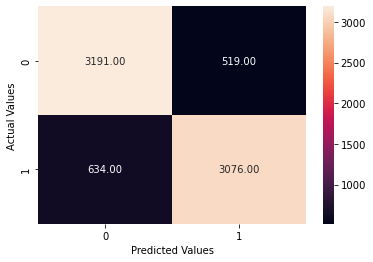

In [67]:
print(classification_report( y_test, y_pre_knn))
cm_plot = sb.heatmap(confusion_matrix(y_test, y_pre_knn), annot = True, fmt = '.2f')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')